<a href="https://colab.research.google.com/github/sundarp17/Data-science/blob/main/Machine-Learning/Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

In [2]:
rcParams['figure.figsize']=5,4


Logistic Regression on titanic data


In [3]:
titanic_training = pd.read_csv(r'/content/titanic-training-data.csv')
titanic_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


checking whether the target variable is binary.

Target variable - survival.

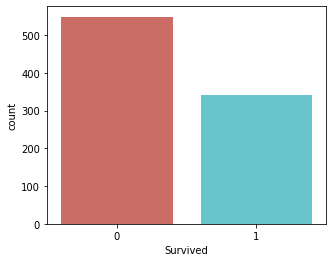

In [4]:
sb.countplot(x='Survived',data=titanic_training,palette='hls')


checking missing values

In [5]:
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

cabin has more missing values. So, we can remove that. Similarly, embarked has only 2 missing values. So, its better if we remove only those 2 rows. 

Person's name, passenger id, ticket number are irrelavant for predicting survivability. So, we can drop these columns. 

In [7]:
titanic_training = titanic_training.drop(['PassengerId','Name','Ticket'],axis=1)
titanic_training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
titanic_training =titanic_training.drop(['Cabin'],axis=1)

In [9]:
titanic_training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Imputing missing values

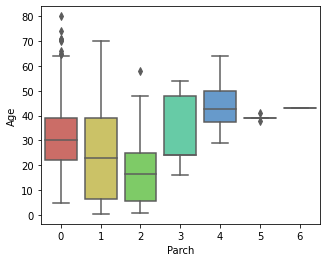

In [10]:
sb.boxplot(x='Parch',y='Age',data=titanic_training,palette='hls')

If we see above boxplot, younger person has more likely to have 2 relatives. For the older person, they may have 4 children.

In [11]:
parch_groups = titanic_training.groupby(titanic_training['Parch'])
parch_groups.mean()

,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,
0,0.343658,2.321534,32.178503,0.237463,25.586774
1,0.550847,2.203390,24.422000,1.084746,46.778180
2,0.500000,2.275000,17.216912,2.062500,64.337604
3,0.600000,2.600000,33.200000,1.000000,25.951660
4,0.000000,2.500000,44.500000,0.750000,84.968750
5,0.200000,3.000000,39.200000,0.600000,32.550000
6,0.000000,3.000000,43.000000,1.000000,46.900000


In [14]:
'''giving mean value, as the boxplot shows no huge data for parch =5,6 '''
def age_approx(cols):
  age = cols[0]
  parch = cols[1]

  if pd.isnull(age):
    if parch ==0:
      return 32
    elif parch == 1:
      return 24
    elif parch == 2:
      return 17
    elif parch ==3:
      return 33
    elif parch ==4:
      return 44
    else:
      return 30             
  else:
    return age

titanic_training['Age']=titanic_training[['Age','Parch']].apply(age_approx,axis=1)
titanic_training.isnull().sum()
    


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
titanic_training.dropna(inplace=True)
titanic_training.reset_index(inplace=True, drop=True)

print(titanic_training.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB
None


Converting categorical variables into dummy indicators

we need to convert sex, embarked columns into numeric(categorical)

In [19]:
titanic_training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

gender_cate = titanic_training['Sex']
gender_encoded = label_encoder.fit_transform(gender_cate)
gender_encoded[:5]

array([1, 0, 0, 0, 1])

1-male, 0 -female

In [21]:
titanic_training['gender']=gender_encoded
titanic_training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,gender
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [22]:
embarked_cate = titanic_training['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cate)
embarked_encoded[:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

We need to have binary output. To do that we need to use one-hot encoder.

In [25]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories = 'auto')
embarked_onehot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_onehot_mat = embarked_onehot.toarray()

embarked_df = pd.DataFrame(embarked_onehot_mat,columns=['C','Q','S'])
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [26]:
titanic_training = titanic_training.drop(['Sex','Embarked'],axis=1)
titanic_training.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [27]:
titanic_data = pd.concat([titanic_training,embarked_df],axis=1,verify_integrity=True).astype(float)
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,C,Q,S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


Checking for independence between the features.

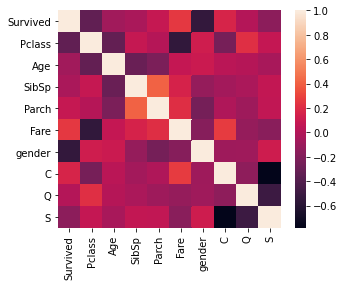

In [29]:
sb.heatmap(titanic_data.corr())

pclass and fare are clearly dependent of each other.

In [30]:
titanic_data = titanic_data.drop(['Pclass','Fare'],axis=1)
titanic_data.head()

,Survived,Age,SibSp,Parch,gender,C,Q,S
0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


Splitting the data set into train and test

In [34]:
X_train, x_test, Y_train, y_test = train_test_split(titanic_data.drop(['Survived'],axis=1),titanic_data['Survived'],test_size = 0.2,random_state=200)

print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)


(711, 7)
(711,)
(178, 7)
(178,)


Deploying and evaluating the model

In [35]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = logreg.predict(x_test)

Model Evaluation

Classification report without cross-validation

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



k fold cross validation

In [39]:
y_train_pred  = cross_val_predict(logreg,X_train,Y_train,cv=5)
confusion_matrix(Y_train,y_train_pred)

array([[379,  61],
       [ 91, 180]])

379,180 are the number of correct predictions, 91 and 63 are incorrect predictions.

In [40]:
precision_score(Y_train,y_train_pred)

0.7468879668049793